<a href="https://colab.research.google.com/github/sameh999/Machine-learning/blob/main/ML_Assignment_2_Group9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install JasonUtils codetiming

     |████████████████████████████████| 1.3 MB 5.2 MB/s 
     |████████████████████████████████| 2.0 MB 40.9 MB/s 
  Created wheel for simpleaudio: filename=simpleaudio-1.0.4-cp37-cp37m-linux_x86_64.whl size=2065942 sha256=d85564e79989a2e8949c20b72f650b24a2f93b8cafdf37108ba248fed8cd9edd
  Stored in directory: /root/.cache/pip/wheels/9a/d6/39/e26b6f988cc5acd1fba2c1b18f0debe27bdee3e1e53f4c93f9
Successfully built simpleaudio


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be import

Naive Bayes Accuracy of train set: 0.8125
Naive Bayes Accuracy of test set: 0.7631578947368421


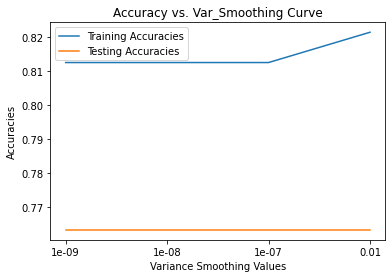

No handles with labels found to put in legend.


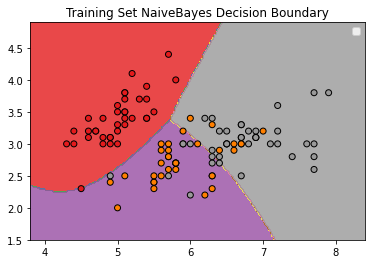

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.68      0.74      0.70        34
           2       0.77      0.73      0.75        41

    accuracy                           0.81       112
   macro avg       0.81      0.81      0.81       112
weighted avg       0.82      0.81      0.81       112



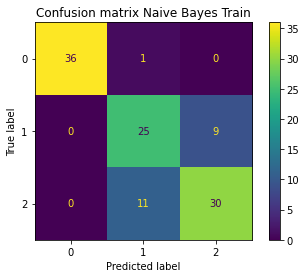

No handles with labels found to put in legend.


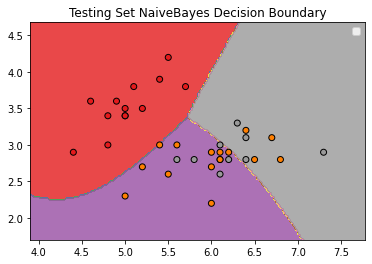

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.71      0.75      0.73        16
           2       0.50      0.44      0.47         9

    accuracy                           0.76        38
   macro avg       0.74      0.73      0.73        38
weighted avg       0.76      0.76      0.76        38



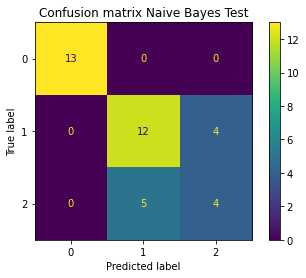

No handles with labels found to put in legend.


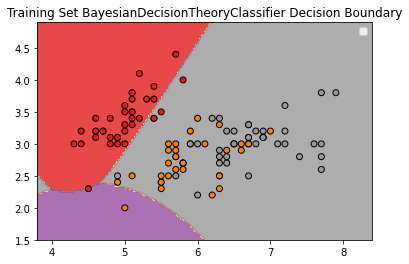

              precision    recall  f1-score   support

           0       1.00      0.86      0.93        37
           1       0.50      0.03      0.06        34
           2       0.53      1.00      0.69        41

    accuracy                           0.66       112
   macro avg       0.68      0.63      0.56       112
weighted avg       0.67      0.66      0.58       112



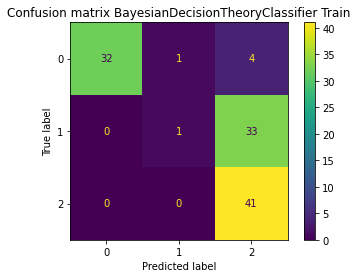

No handles with labels found to put in legend.


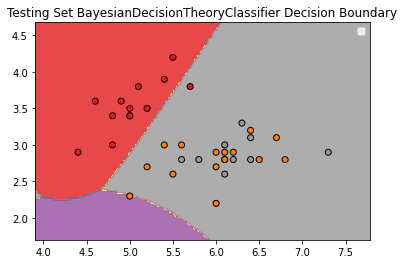

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       1.00      0.06      0.12        16
           2       0.36      1.00      0.53         9

    accuracy                           0.58        38
   macro avg       0.79      0.66      0.54        38
weighted avg       0.85      0.58      0.50        38



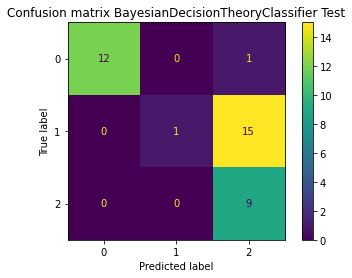

Main: 2.2472 seconds


In [ ]:
import numpy as np
from JasonUtils.Results import results
from codetiming import Timer
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.base import BaseEstimator, ClassifierMixin, clone
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.utils.validation import check_is_fitted
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import pandas as pd 
from sklearn.utils import check_X_y

# function thatplot Decision Boundries  
def plotDecisionBoundary(filepath, X, y, est, title=''):
    plt.close('all')
    plt.figure()
    cm = plt.cm.Set1
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = est.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cm,
        edgecolors='k',
        alpha=1,
    )
    plt.title(title)
    plt.legend()
    plt.savefig(filepath)
    plt.show()



class BayesianDecisionTheoryClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, estimator, utilityMat):
        self.estimator = estimator
        self.utilityMat = utilityMat

    def fit(self, X, y):
      # check inputs
        check_X_y(X,y)
        self.classes_ = np.unique(y)
        self.estimator_ = clone(self.estimator).fit(X, y)
        return self

    # get prediction probability function 
    def predict_proba(self, X):
        check_is_fitted(self)
        prob = self.estimator_.predict_proba(X)
        probList = [(prob * self.utilityMat[index]).sum(axis=1).reshape((-1, 1))
                    for index, c in enumerate(self.classes_)]
        prob = np.hstack(probList)
        return prob
    # predict be able to output text format y by making outputTxt = True 
    def predict(self, X, outputTxt=False):
      # use argmin instead of argmax as Risk matrix is negative values
      pred = self.predict_proba(X).argmin(axis=1)

      # change labels to out text if outputTxt is True 
      if outputTxt:
          new_y = []
          for i,value in enumerate(pred):
            if value == 0:
              new_y.append('Setosa')
            elif value == 1:
              new_y.append('Versicolor')
            else:
              new_y.append('Virginica')
          pred= new_y
          return pred
      return self.classes_[pred]


@Timer(text='Main: {:0.4f} seconds')
def main():
    # Load the Iris dataset
    iris = datasets.load_iris()
    #Drop the petal length and petal width features to form a 2D Iris dataset 
    X, y = iris.data[:, [0, 1]], iris.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    
    # applying Naive Bayes model
    nb = GaussianNB()
    # train model 
    nb.fit(X_train, y_train)

    # get test predection label
    yPred = nb.predict(X_test)

    # get training predection label 
    ytrPred = nb.predict(X_train)

    # Model Accuracy, how often is the classifier correct? for testing and training data set
    print("Naive Bayes Accuracy of train set:",metrics.accuracy_score(y_train, ytrPred))
    print("Naive Bayes Accuracy of test set:",metrics.accuracy_score(y_test, yPred))

    
    #4. Tune hyperparameters of Naive Bayes Classifier (i.e., var_smoothing). Try var_smoothing as 1e-9, 1e-8, 1e-7.
    # and  Plot accuracy vs var_smoothing curve for training and testing set. 
    var_smoothing_vals = [1e-9,1e-8,1e-7,1e-2]
    train_accuracies=[]
    test_accuracies=[]

    #model 1 that with var_smoothing = 1e-9 
    nb1 = GaussianNB(var_smoothing=1e-9)
    nb1.fit(X_train, y_train)
    yPred1 = nb1.predict(X_test)
    ytrPred1 = nb1.predict(X_train)
    # get model train and test Accuracies
    train_accuracy1 = metrics.accuracy_score(y_train, ytrPred1)
    test_accuracy1 = metrics.accuracy_score(y_test, yPred1)
    # append accuricies to accuracy array
    train_accuracies.append(train_accuracy1)
    test_accuracies.append(test_accuracy1)
    
    
    #model 2 that with var_smoothing = 1e-8 
    nb2 = GaussianNB(var_smoothing=1e-8)
    nb2.fit(X_train, y_train)
    yPred2 = nb2.predict(X_test)
    ytrPred2 = nb2.predict(X_train)
    # get model train and test Accuracies
    train_ac2 = metrics.accuracy_score(y_train, ytrPred2)
    test_ac2 = metrics.accuracy_score(y_test, yPred2)
    # append accuricies to accuracy array
    train_accuracies.append(train_ac2)
    test_accuracies.append(test_ac2)

    
    
    #model 3 that with var_smoothing = 1e-7 
    nb3 = GaussianNB(var_smoothing=1e-7)
    nb3.fit(X_train, y_train)
    yPred3 = nb3.predict(X_test)
    ytrPred3 = nb3.predict(X_train)
    # get model train and test Accuracies
    train_ac3 = metrics.accuracy_score(y_train, ytrPred3)
    test_ac3 = metrics.accuracy_score(y_test, yPred3)
    # append accuricies to accuracy array
    train_accuracies.append(train_ac3)
    test_accuracies.append(test_ac3)

    
    #model 4 that with var_smoothing = 1e-2 
    nb4 = GaussianNB(var_smoothing=1e-2)
    nb4.fit(X_train, y_train)
    yPred4 = nb4.predict(X_test)
    ytrPred4 = nb4.predict(X_train)
    # get model train and test Accuracies
    train_ac4 = metrics.accuracy_score(y_train, ytrPred4)
    test_ac4 = metrics.accuracy_score(y_test, yPred4)
    # append accuricies to accuracy array
    train_accuracies.append(train_ac4)
    test_accuracies.append(test_ac4)

    values = range(len(var_smoothing_vals))
    plt.plot(values, train_accuracies, label = "Training Accuracies")
    plt.plot(values, test_accuracies, label = "Testing Accuracies")
    plt.xlabel("Variance Smoothing Values")
    plt.xticks(values, var_smoothing_vals)
    plt.ylabel("Accuracies")
    plt.title("Accuracy vs. Var_Smoothing Curve")
    plt.legend()
    plt.show()

    #  For Training Set NaiveBayes
    plotDecisionBoundary(f'NaiveBayes_train.png', X_train, y_train, nb, 
                         'Training Set NaiveBayes Decision Boundary')
    print(metrics.classification_report(y_train, ytrPred))
    plot_confusion_matrix(nb, X_train, y_train)
    plt.title("Confusion matrix Naive Bayes Train")
    plt.show()

    #  For Testing Set NaiveBayes
    plotDecisionBoundary(f'NaiveBayes_test.png', X_test, y_test, nb, 
                         'Testing Set NaiveBayes Decision Boundary')
    print(metrics.classification_report(y_test, yPred))
    plot_confusion_matrix(nb, X_test, y_test)
    plt.title("Confusion matrix Naive Bayes Test")
    plt.show()

    # Risk Matrix
    utilityMat = np.array([
        [-10, -5, -5],
        [-5, -10, -5],
        [-5, -5, -100],
    ])
    
    # applying Bayesian Decision Theory Classifier on Naive Bayes
    bdtc = BayesianDecisionTheoryClassifier(nb, utilityMat)
    bdtc.fit(X_train, y_train)
    yPred = bdtc.predict(X_test)
    ytrPred = bdtc.predict(X_train)

    #  For Training Set BayesianDecisionTheoryClassifier
    plotDecisionBoundary(f'BDTC_train.png', X_train, y_train, bdtc, 'Training Set BayesianDecisionTheoryClassifier Decision Boundary')
    print(metrics.classification_report(y_train, ytrPred))
    plot_confusion_matrix(bdtc, X_train, y_train)
    plt.title("Confusion matrix BayesianDecisionTheoryClassifier Train")
    plt.show()

    #  For Training Set BayesianDecisionTheoryClassifier
    plotDecisionBoundary(f'BDTC_test.png', X_test, y_test, bdtc, 'Testing Set BayesianDecisionTheoryClassifier Decision Boundary')
    print(metrics.classification_report(y_test, yPred))
    plot_confusion_matrix(bdtc, X_test, y_test)
    plt.title("Confusion matrix BayesianDecisionTheoryClassifier Test")
    plt.show()

    pass


if __name__ == '__main__':
    main()
